In [44]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import pickle, os, time

import entropy

basedir = 'saveddata/Regression/v5sq-eta'
basedir = 'saveddata/NoisyClassifier/v1'
#vals = {'VIB' :{'YT':[],'XT':[], 'XTlb':[]},
#        'nlIB':{'YT':[],'XT':[], 'XTlb':[]},}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
vals = {'VIB'  : {'tst' : {}, 'trn' : {}}, 
        'nlIB' : {'tst' : {}, 'trn' : {}}}

for fname in os.listdir(basedir):
    with open(basedir + '/' + fname, 'rb') as f:
        if fname.endswith('-base') or fname.startswith('_tf_basemodel') or fname=='checkpoint':
            continue
        _, mode, _, _ = fname.split("-")
        cfg, saved_data = pickle.load(f)
        lrow = saved_data[-1]
        var, beta = lrow['noisevar'], lrow['beta']
        for r in ['trn','tst']:
            l     = lrow[r]
            mx    = l['activations']
            n, d  = mx.shape
            mcH   = entropy.get_mc_entropy(mx, var)
            hCond = entropy.Gaussian_entropy_np(d, var)
            l['Ixt_mc'] = mcH - hCond
            print('%30s %s beta: %0.4f Ixt: %0.2f-%0.2f (%0.2f) Iyt: %0.2f' % 
                  (fname, r, beta, l['Ixt_lb'], l['Ixt'], l['Ixt_mc'], l['Iyt']))

            if beta not in vals[mode][r] or \
               (mcXT <= vals[mode][r][beta]['Ixt_mc'] and yt >= vals[mode][r][beta]['Iyt']):
                vals[mode][r][beta] = lrow[r]
                if False:
                    plt.figure()
                    plt.scatter(mx[:,0], mx[:,1], s=l['noisevar'], alpha=.3)
                    plt.title('beta=%.4f mode=%s'%(beta, mode))
            


      results-VIB-0.00100-run0 trn beta: 0.0010 Ixt: 4.21-5.37 (4.39) Iyt: 0.69
      results-VIB-0.00100-run0 tst beta: 0.0010 Ixt: 4.22-5.37 (4.38) Iyt: 0.69


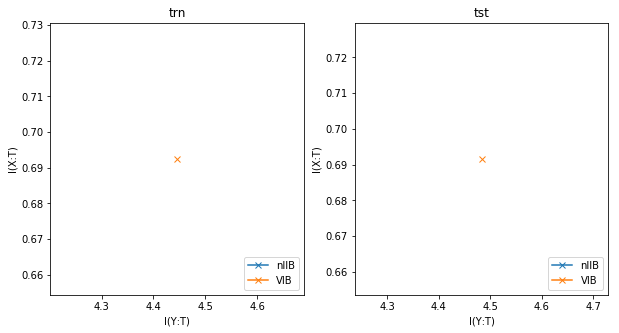

In [53]:
plt.figure(figsize=(10,5))
for rndx, r in enumerate(['trn','tst']):
    plt.subplot(1,2,rndx+1)
    for mode in ['nlIB', 'VIB']:
        d = vals[mode][r]
        bvals = sorted(d.keys())
        xt   = [d[b]['Ixt'] for b in bvals]
        xtlb = [d[b]['Ixt_lb'] for b in bvals]
        xtmc = [d[b]['Ixt_mc'] for b in bvals]
        yt   = [d[b]['Iyt'] for b in bvals]
        plt.plot(xtmc, yt, marker='x', label=mode)
        #plt.fill_betweenx(yt, xtlb, xt, alpha=0.3, label=mode)
    plt.ylabel('I(X:T)')
    plt.xlabel('I(Y:T)')
    # plt.plot([0, np.log(2)], [0,np.log(2)], 'k--')
    plt.legend(loc='lower right')
    plt.title(r)

In [36]:
#print(vals['nlIB']['trn'][.05])
plt.figure()
plt.scatter(*vals['VIB']['tst'][.05]['act'].T, s=vals['VIB']['tst'][.05]['noisevar'], alpha=0.1)
plt.figure()
plt.scatter(*vals['nlIB']['tst'][.05]['act'].T, s=vals['nlIB']['tst'][.05]['noivarvar'], alpha=0.1)
#print(get_mc(vals['nlIB']['trn'][.95]['noisevar'])


KeyError: 0.05

<Figure size 432x288 with 0 Axes>